### Imports and loading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("sales_data_sample.csv", encoding = 'unicode_escape')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Performing exploratory data analysis (EDA)
   * Viewing descriptive analytics.
   * Visualizing important features (Numeric, Categorical) distributions.
   * Check for duplicate entries.
   * Handle missing values.
   * Performing RFM Analysis, which is a common way of analyzing customer data.
     * RFM (Recency, Frequency, Monetary) analysis is a method used for analyzing customer value based on their transaction history.
     * It segments customers into groups based on their transaction behaviors.
   * Scaling features.






In [2]:
# Calculate descriptive statistics for dataset
describe = df.describe().T
describe.style.background_gradient(cmap = "Greens")

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.000000,10258.725115,92.085478,10100.000000,10180.000000,10262.000000,10333.500000,10425.000000
QUANTITYORDERED,2823.000000,35.092809,9.741443,6.000000,27.000000,35.000000,43.000000,97.000000
PRICEEACH,2823.000000,83.658544,20.174277,26.880000,68.860000,95.700000,100.000000,100.000000
ORDERLINENUMBER,2823.000000,6.466171,4.225841,1.000000,3.000000,6.000000,9.000000,18.000000
SALES,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000
QTR_ID,2823.000000,2.717676,1.203878,1.000000,2.000000,3.000000,4.000000,4.000000
MONTH_ID,2823.000000,7.092455,3.656633,1.000000,4.000000,8.000000,11.000000,12.000000
YEAR_ID,2823.000000,2003.815090,0.699670,2003.000000,2003.000000,2004.000000,2004.000000,2005.000000
MSRP,2823.000000,100.715551,40.187912,33.000000,68.000000,99.000000,124.000000,214.000000


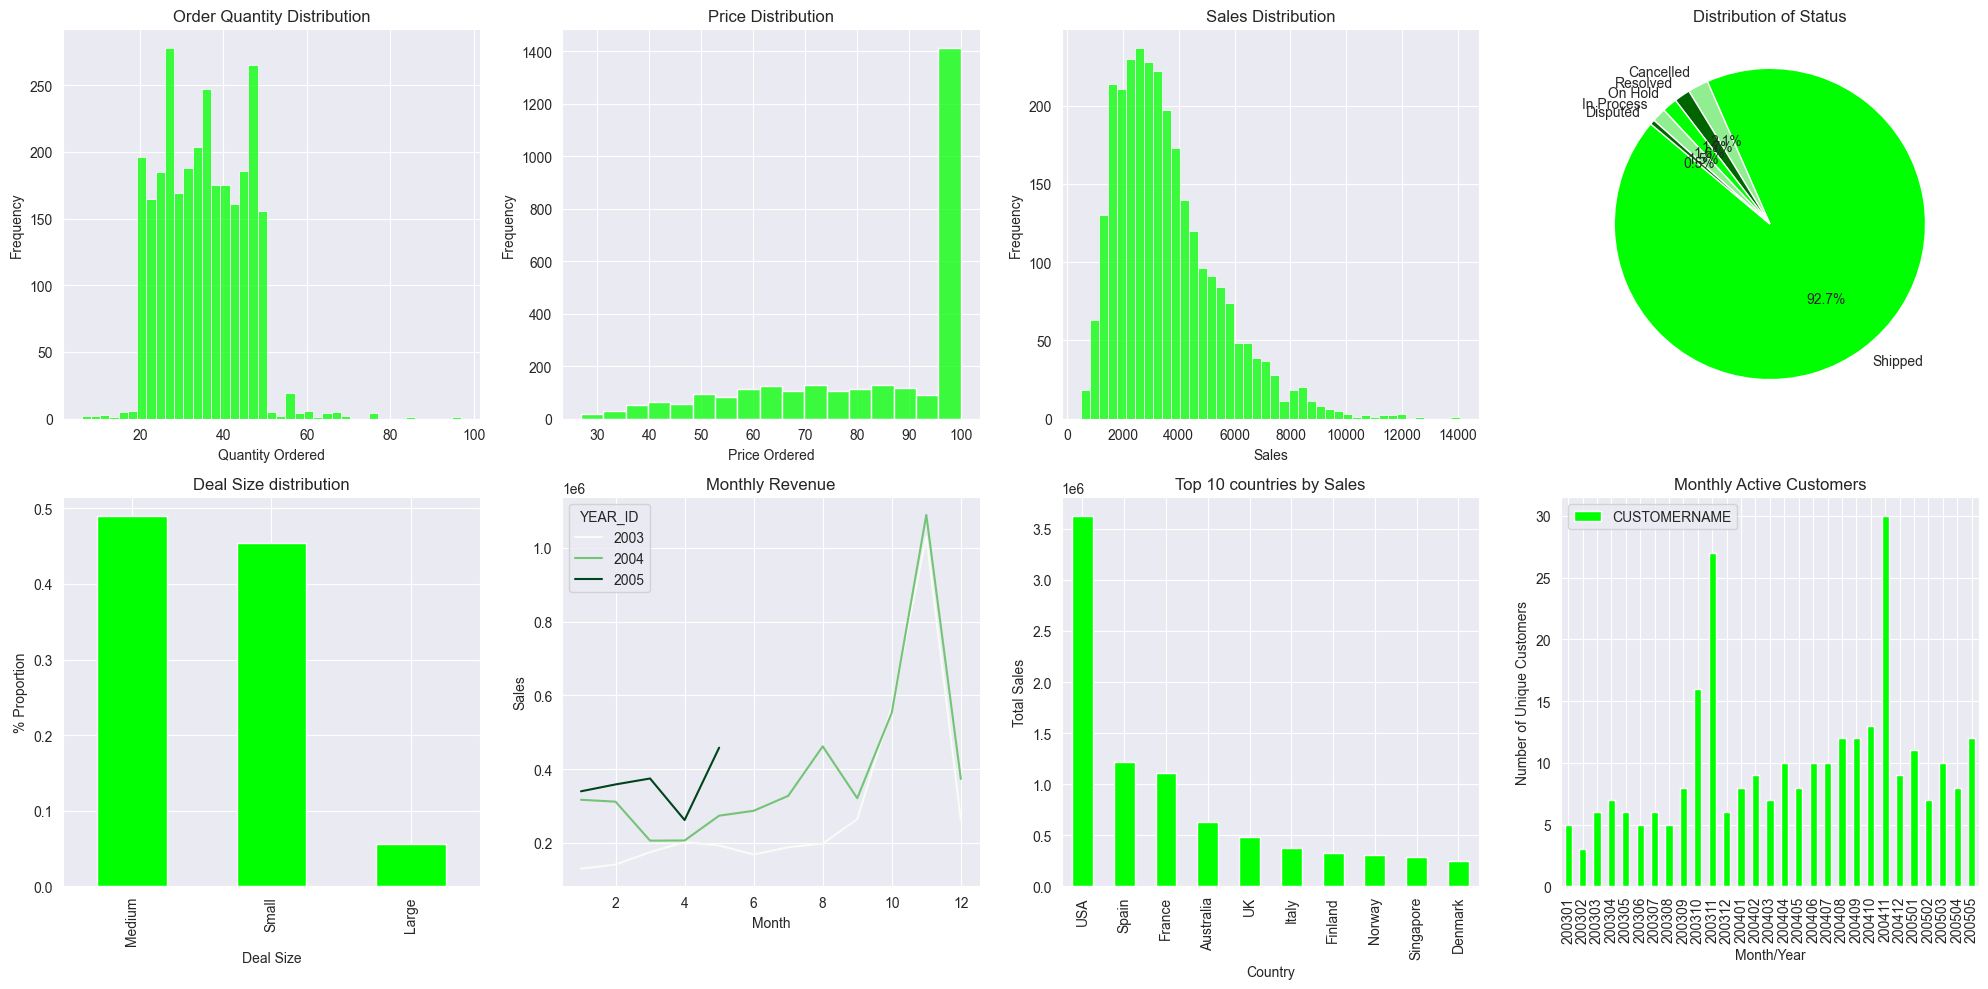

In [3]:
# Visualizing important features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Order Quantity Distribution
sns.histplot(df['QUANTITYORDERED'], ax=axes[0, 0], color='lime')
axes[0, 0].set_title('Order Quantity Distribution')
axes[0, 0].set_xlabel('Quantity Ordered')
axes[0, 0].set_ylabel('Frequency')

# Price Distribution
sns.histplot(df['PRICEEACH'], ax=axes[0, 1], color='lime')
axes[0, 1].set_title('Price Distribution')
axes[0, 1].set_xlabel('Price Ordered')
axes[0, 1].set_ylabel('Frequency')

# Sales Distribution
sns.histplot(df['SALES'], ax=axes[0, 2], color='lime')
axes[0, 2].set_title('Sales Distribution')
axes[0, 2].set_xlabel('Sales')
axes[0, 2].set_ylabel('Frequency')

# Status Distribution
status_counts = df['STATUS'].value_counts(normalize=True)
axes[0, 3].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['lime', 'lightgreen', 'darkgreen'])
axes[0, 3].set_title('Distribution of Status')

# Deal size Distribution
df['DEALSIZE'].value_counts(normalize=True).plot(kind='bar', ax=axes[1, 0], color='lime')
axes[1, 0].set_title('Deal Size distribution')
axes[1, 0].set_xlabel('Deal Size')
axes[1, 0].set_ylabel('% Proportion')

# Monthly Revenue
monthly_revenue = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
sns.lineplot(x="MONTH_ID", y="SALES", hue="YEAR_ID", data=monthly_revenue, ax=axes[1, 1], palette='Greens')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Sales')
axes[1, 1].set_title('Monthly Revenue')

# Top 10 countries by Sales
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)[:10]
top_cities.plot(kind='bar', ax=axes[1, 2], color='lime')
axes[1, 2].set_title('Top 10 countries by Sales')
axes[1, 2].set_xlabel('Country')
axes[1, 2].set_ylabel('Total Sales')

# Monthly Active Customers
df['YEAR_MONTH'] = df['YEAR_ID'].astype(str) + df['MONTH_ID'].apply(lambda x: str(x).zfill(2))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar', x='YEAR_MONTH', y='CUSTOMERNAME', ax=axes[1, 3], color='lime')
axes[1, 3].set_title('Monthly Active Customers')
axes[1, 3].set_xlabel('Month/Year')
axes[1, 3].set_ylabel('Number of Unique Customers')
axes[1, 3].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
# View top customers
customer_totals = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
top_customers = customer_totals.sort_values(by='SALES', ascending=False)
print("Top Customers:")
top_customers.head().style.background_gradient(cmap = "Greens")

Top Customers:


,CUSTOMERNAME,SALES
33,Euro Shopping Channel,912294.110000
55,Mini Gifts Distributors Ltd.,654858.060000
6,"Australian Collectors, Co.",200995.410000
58,Muscle Machine Inc,197736.940000
44,La Rochelle Gifts,180124.900000


In [5]:
# Convert the 'ORDERDATE' column to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Calculate the number of unique values in each categorical column
categorical_columns  = df.select_dtypes(include=['object']).columns
print(f"There are {categorical_columns.size} categorical columns in the dataset.")
unique_value_counts = pd.DataFrame(df[categorical_columns].nunique())
unique_value_counts.style.background_gradient(cmap="Greens")

There are 16 categorical columns in the dataset.


,0
STATUS,6
PRODUCTLINE,7
PRODUCTCODE,109
CUSTOMERNAME,92
PHONE,91
ADDRESSLINE1,92
ADDRESSLINE2,9
CITY,73
STATE,16
POSTALCODE,73


In [6]:
# Total number of missing values for each column
print("Total Missing Values of each columns;")
isnull = pd.DataFrame(df.isnull().sum())
isnull.style.background_gradient(cmap="Greens")

Total Missing Values of each columns;


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [7]:
# Calculating missing value percentage in features
print(f"ADDRESSLINE2 missing value rates: {round(df['ADDRESSLINE2'].isnull().sum() * 100 / len(df),2)}%")
print(f"STATE missing value rates: {round(df['STATE'].isnull().sum() * 100 / len(df),2)}%")
print(f"TERRITORY missing value rates: {round(df['TERRITORY'].isnull().sum() * 100 / len(df),2)}%")
print(f"POSTALCODE missing value rates: {round(df['POSTALCODE'].isnull().sum() * 100 / len(df),2)}%")

# Drop columns with NULL values
df.drop(columns=["STATE", "ADDRESSLINE2", "TERRITORY"], inplace=True)

# Drop irrelevant columns
df.drop(columns=["CONTACTFIRSTNAME", "CONTACTLASTNAME", "PHONE", "ADDRESSLINE1", "POSTALCODE"], inplace=True)

ADDRESSLINE2 missing value rates: 89.3%
STATE missing value rates: 52.64%
TERRITORY missing value rates: 38.04%
POSTALCODE missing value rates: 2.69%


In [8]:
# Check for duplicate entries
duplicate_entries = df[df.duplicated()]

# Print the duplicate entries, if any
if not duplicate_entries.empty:
    print("Duplicate entries found:")
    print(duplicate_entries)
else:
    print("No duplicate entries found.")

No duplicate entries found.


### Feature Engineering
* Calculating RFM Metrics:
        * **Recency (R):** Calculate the number of days since the customer's last purchase. The more recent the purchase, the higher the recency score.
        * **Frequency (F):** Calculate the total number of purchases made by the customer over a specific period.
        * **Monetary Value (M):** Calculate the total monetary value of purchases made by the customer.
* Calculate RFM Scores based on quartiles.
    * For recency, customers with the most recent purchases receive the highest score.
    * For frequency and monetary value, customers with the highest values receive the highest score.

In [9]:
# Apply log transformation to "SALES" column
df['price_log'] = np.log(df['SALES']+1)

In [10]:
from rfm import RFM

rfm = RFM(df, "CUSTOMERNAME", "ORDERDATE", "SALES")
rfm.rfm_table.drop(['segment'], axis=1).style.background_gradient(cmap="Greens")

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score
0,Salzburg Collectables,14,40,149798.480000,5,5,5,555
1,L'ordine Souveniers,21,39,142601.110000,5,5,5,555
2,Euro Shopping Channel,0,259,912293.110000,5,5,5,555
3,La Rochelle Gifts,0,53,180124.680000,5,5,5,555
4,The Sharp Gifts Warehouse,39,40,160010.270000,5,5,5,555
5,Souveniers And Things Co.,2,46,151570.700000,5,5,5,555
6,Mini Gifts Distributors Ltd.,2,180,654857.570000,5,5,5,555
7,Handji Gifts& Co,38,36,115498.570000,5,5,4,554
8,Danish Wholesale Imports,46,36,145041.510000,5,4,5,545
9,"UK Collectables, Ltd.",53,29,118008.190000,5,4,4,544


### Results interpretation:
   * **Frequency** shows how often the customer makes purchases.
   * **Monetary** shows the total amount of money spent by the customer.
   * **Recency** shows how long it's been (in the past days) since the customer's last purchase.
   * **r, f, m** individual scores for each metric assigned by sorting the customers and dividing them to quantiles.
   * **rfm_score** a single value representing the overall value or engagement level of a customer.
   * **

In [11]:
data = rfm.rfm_table[['CUSTOMERNAME', 'recency', 'frequency', 'monetary_value', 'r', 'f', 'm', 'rfm_score']]

# Applying log transformation to new features
data["recency"] = np.log(data["recency"]+1)
data["frequency"] = np.log(data["frequency"]+1)
data["monetary_value"] = np.log(data["monetary_value"]+1)
data.head().style.background_gradient(cmap="Greens")

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score
0,Salzburg Collectables,2.708050,3.713572,11.917053,5,5,5,555
1,L'ordine Souveniers,3.091042,3.688879,11.867814,5,5,5,555
2,Euro Shopping Channel,0.000000,5.560682,13.723718,5,5,5,555
3,La Rochelle Gifts,0.000000,3.988984,12.101410,5,5,5,555
4,The Sharp Gifts Warehouse,3.688879,3.713572,11.983000,5,5,5,555


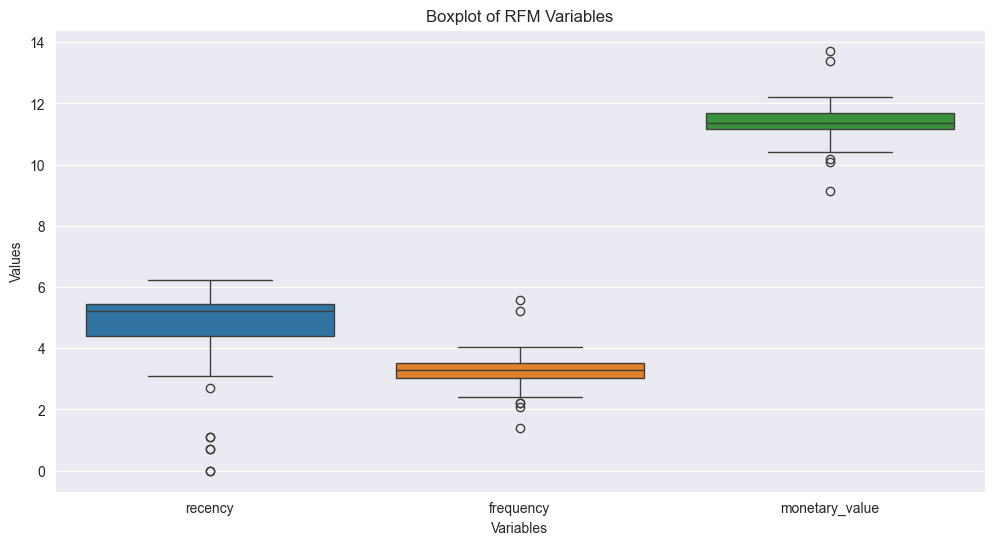

In [12]:
# Checking for outliers using boxplot diagram
plt.figure(figsize=(12, 6))
sns.boxplot(data[['recency', 'frequency', 'monetary_value']])
plt.title('Boxplot of RFM Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [13]:
# Removing outliers for each feature separately
for col in ['recency', 'frequency', 'monetary_value']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    length_before = len(data)
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    length_after = len(data)

print("Number of outliers removed:", length_before - length_after)

data.style.background_gradient(cmap="Greens")

Number of outliers removed: 1


,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score
1,L'ordine Souveniers,3.091042,3.688879,11.867814,5,5,5,555
4,The Sharp Gifts Warehouse,3.688879,3.713572,11.983000,5,5,5,555
7,Handji Gifts& Co,3.663562,3.610918,11.657022,5,5,4,554
8,Danish Wholesale Imports,3.850148,3.610918,11.884782,5,4,5,545
9,"UK Collectables, Ltd.",3.988984,3.401197,11.678518,5,4,4,544
11,"Tokyo Collectables, Ltd",3.688879,3.496508,11.699934,5,4,4,544
12,Gift Depot Inc.,3.295837,3.258097,11.531705,5,3,4,534
13,Gifts4AllAges.com,3.258097,3.295837,11.329132,5,3,3,533
14,Auto Canal Petit,4.007333,3.332205,11.442197,5,3,3,533
16,Mini Caravy,3.871201,2.995732,11.295260,5,2,3,523


In [14]:
# Data scaling
sc = StandardScaler()
scaled_data =sc.fit_transform(data[['recency', 'frequency', 'monetary_value']])
data[['recency', 'frequency', 'monetary_value']] = scaled_data

# Data description
data.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
recency,80.000000,0.000000,1.006309,-2.450956,-0.666749,0.293099,0.572636,1.504373
frequency,80.000000,0.000000,1.006309,-2.226568,-0.634635,0.080276,0.651121,2.155518
monetary_value,80.000000,-0.000000,1.006309,-2.441493,-0.509501,-0.078674,0.706477,2.121736
r,80.000000,2.812500,1.397047,1.000000,2.000000,3.000000,4.000000,5.000000
f,80.000000,2.987500,1.364039,1.000000,2.000000,3.000000,4.000000,5.000000
m,80.000000,3.000000,1.359449,1.000000,2.000000,3.000000,4.000000,5.000000


In [15]:
data.head().style.background_gradient(cmap="Greens")

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score
1,L'ordine Souveniers,-2.450956,1.198359,1.225767,5,5,5,555
4,The Sharp Gifts Warehouse,-1.698222,1.268602,1.526450,5,5,5,555
7,Handji Gifts& Co,-1.730100,0.976583,0.675513,5,5,4,554
8,Danish Wholesale Imports,-1.495170,0.976583,1.270062,5,4,5,545
9,"UK Collectables, Ltd.",-1.320362,0.379994,0.731626,5,4,4,544


### Applying K-Medoids clustering Algorithm
   * Choosing a range of values for K.
   * Using Elbow method to visualize the error rate as a function of K.
   * Setting the number of clusters to the value of the "elbow" point (the point of maximum curvature).
   * Applying K-Medoids algorithm.
   * Adding the labels as a column in the dataframe.
   * Using a scatter plot to visualize the clusters.

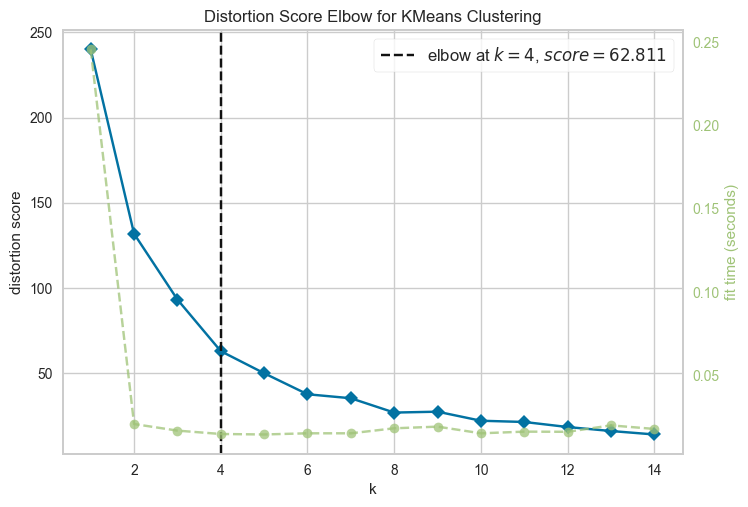

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score,K-Medoids Cluster
1,L'ordine Souveniers,-2.450956,1.198359,1.225767,5,5,5,555,3
4,The Sharp Gifts Warehouse,-1.698222,1.268602,1.526450,5,5,5,555,3
7,Handji Gifts& Co,-1.730100,0.976583,0.675513,5,5,4,554,3
8,Danish Wholesale Imports,-1.495170,0.976583,1.270062,5,4,5,545,3
9,"UK Collectables, Ltd.",-1.320362,0.379994,0.731626,5,4,4,544,3
11,"Tokyo Collectables, Ltd",-1.698222,0.651121,0.787531,5,4,4,544,3
12,Gift Depot Inc.,-2.193100,-0.027084,0.348382,5,3,4,534,3
13,Gifts4AllAges.com,-2.240619,0.080276,-0.180417,5,3,3,533,3
14,Auto Canal Petit,-1.297258,0.183730,0.114730,5,3,3,533,3
16,Mini Caravy,-1.468662,-0.773428,-0.268837,5,2,3,523,3


In [16]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Implement k-Medoids Algorithm
def k_medoids_clustering(dataset, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(dataset)
    return kmedoids.labels_, kmedoids.cluster_centers_

# Determine the optimal number of clusters using KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1, 15))
visualizer.fit(scaled_data)
visualizer.show()

# Assign Data Points to Clusters
optimal_k = visualizer.elbow_value_
labels, medoids = k_medoids_clustering(scaled_data, optimal_k)
labels += 1
data['K-Medoids Cluster'] = labels
data.style.background_gradient(cmap="Greens")

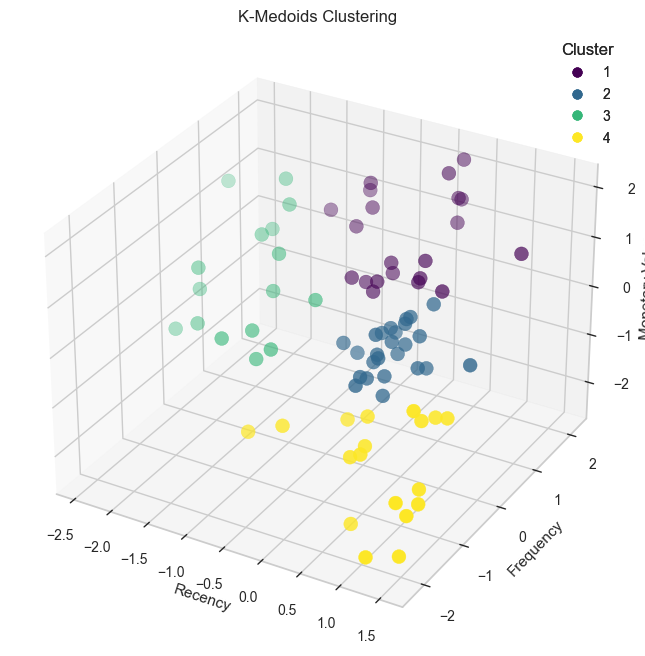

In [17]:
# 3D-Plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['recency'], data['frequency'], data['monetary_value'], c=data['K-Medoids Cluster'], cmap='viridis', s=100)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.title('K-Medoids Clustering')
plt.show()

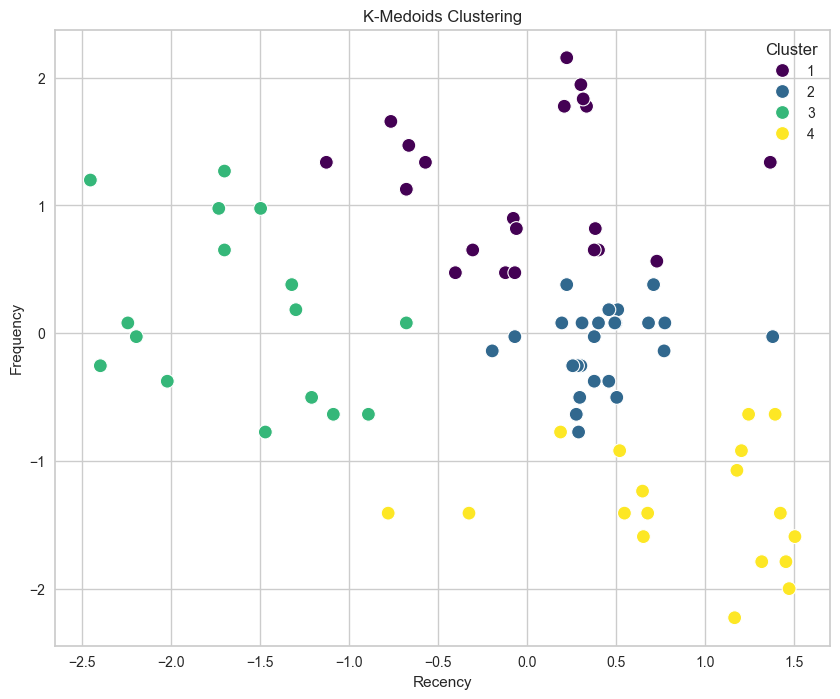

In [18]:
# 2D-Plot of the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='recency', y='frequency', hue='K-Medoids Cluster', data=data, palette='viridis', s=100)
plt.title('K-Medoids Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Agglomerative Clustering


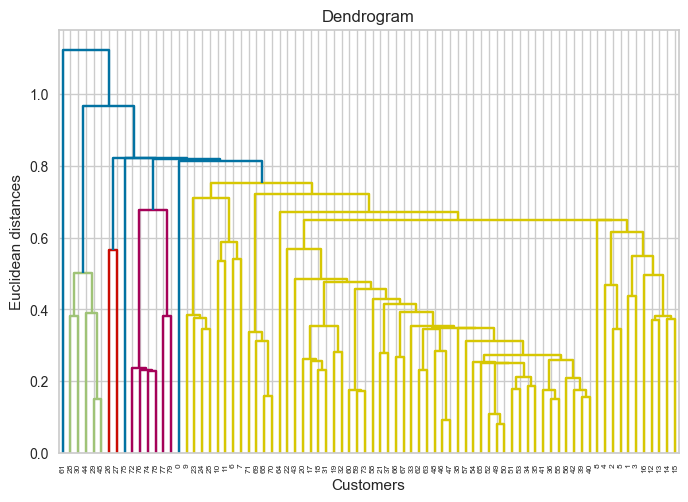

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score,K-Medoids Cluster,Hierarchical Cluster
1,L'ordine Souveniers,-2.450956,1.198359,1.225767,5,5,5,555,3,1
4,The Sharp Gifts Warehouse,-1.698222,1.268602,1.526450,5,5,5,555,3,1
7,Handji Gifts& Co,-1.730100,0.976583,0.675513,5,5,4,554,3,1
8,Danish Wholesale Imports,-1.495170,0.976583,1.270062,5,4,5,545,3,1
9,"UK Collectables, Ltd.",-1.320362,0.379994,0.731626,5,4,4,544,3,1
11,"Tokyo Collectables, Ltd",-1.698222,0.651121,0.787531,5,4,4,544,3,1
12,Gift Depot Inc.,-2.193100,-0.027084,0.348382,5,3,4,534,3,1
13,Gifts4AllAges.com,-2.240619,0.080276,-0.180417,5,3,3,533,3,1
14,Auto Canal Petit,-1.297258,0.183730,0.114730,5,3,3,533,3,1
16,Mini Caravy,-1.468662,-0.773428,-0.268837,5,2,3,523,3,1


In [19]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot the dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='single'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Agglomerative Clustering model
optimal_k = visualizer.elbow_value_
model = AgglomerativeClustering(n_clusters=optimal_k, linkage='single')

labels = model.fit_predict(scaled_data)
labels += 1
data['Hierarchical Cluster'] = labels
data.style.background_gradient(cmap="Greens")

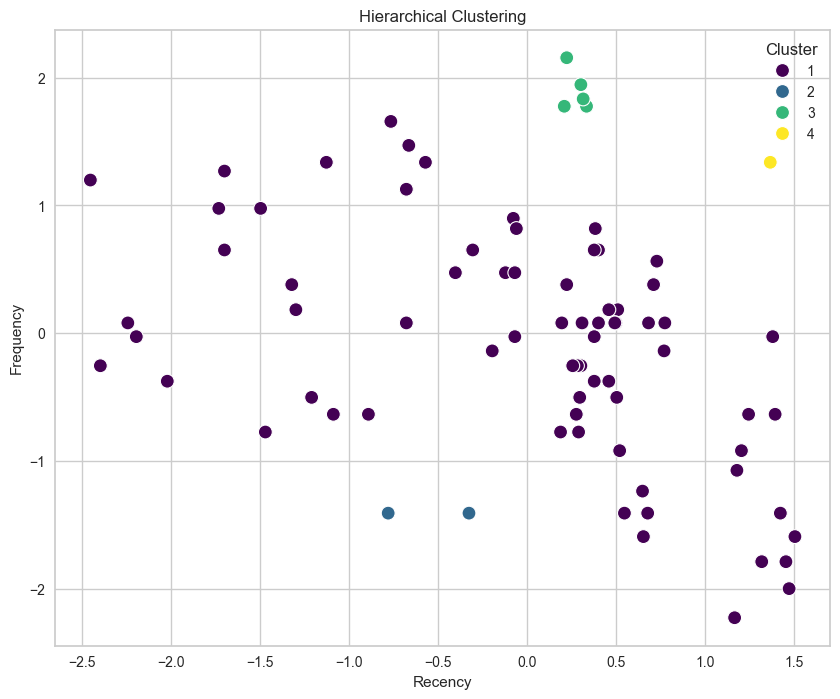

In [20]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='recency', y='frequency', hue='Hierarchical Cluster', data=data, palette='viridis', s=100)
plt.title('Hierarchical Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Fuzzy c-means clustering

In [21]:
import skfuzzy as fuzz

data_array = data[['recency', 'frequency', 'monetary_value']].values.T

k = visualizer.elbow_value_
membership_matrix = fuzz.cmeans(data_array, c=k, m=2, error=0.005, maxiter=1000, init=None)[1]
cluster_labels = np.argmax(membership_matrix, axis=0) + 1
data['Fuzzy Cluster'] = cluster_labels

data.style.background_gradient(cmap="Greens")

,CUSTOMERNAME,recency,frequency,monetary_value,r,f,m,rfm_score,K-Medoids Cluster,Hierarchical Cluster,Fuzzy Cluster
1,L'ordine Souveniers,-2.450956,1.198359,1.225767,5,5,5,555,3,1,4
4,The Sharp Gifts Warehouse,-1.698222,1.268602,1.526450,5,5,5,555,3,1,1
7,Handji Gifts& Co,-1.730100,0.976583,0.675513,5,5,4,554,3,1,4
8,Danish Wholesale Imports,-1.495170,0.976583,1.270062,5,4,5,545,3,1,1
9,"UK Collectables, Ltd.",-1.320362,0.379994,0.731626,5,4,4,544,3,1,4
11,"Tokyo Collectables, Ltd",-1.698222,0.651121,0.787531,5,4,4,544,3,1,4
12,Gift Depot Inc.,-2.193100,-0.027084,0.348382,5,3,4,534,3,1,4
13,Gifts4AllAges.com,-2.240619,0.080276,-0.180417,5,3,3,533,3,1,4
14,Auto Canal Petit,-1.297258,0.183730,0.114730,5,3,3,533,3,1,4
16,Mini Caravy,-1.468662,-0.773428,-0.268837,5,2,3,523,3,1,4


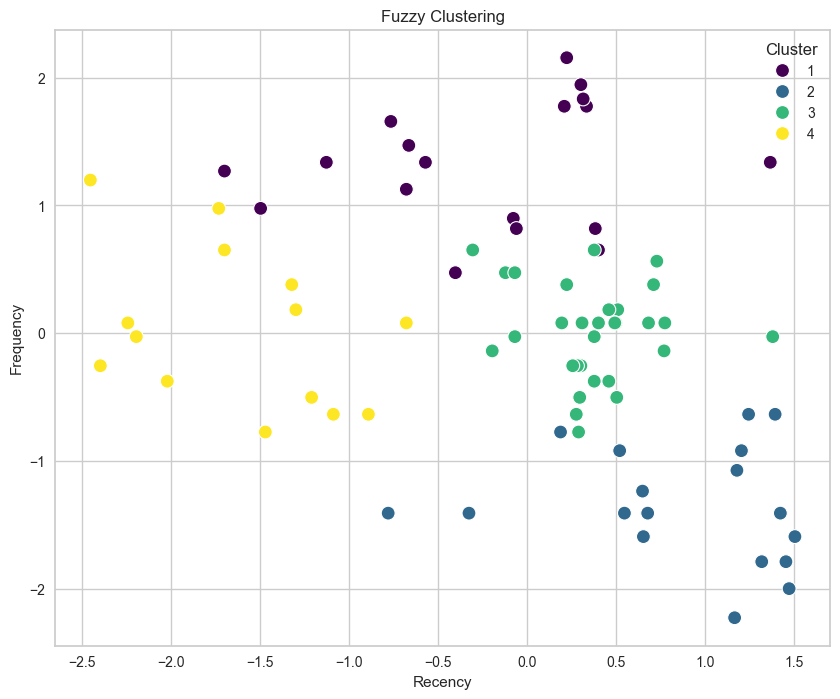

In [22]:
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='recency', y='frequency', hue='Fuzzy Cluster', data=data, palette='viridis', s=100)
plt.title('Fuzzy Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Models' evaluation

In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluating models performance and comparing results

# Silhouette Score
silhouette_kmedoids = silhouette_score(data.drop(['CUSTOMERNAME'], axis=1), data['K-Medoids Cluster'])
silhouette_agglomerative = silhouette_score(data.drop(['CUSTOMERNAME'], axis=1), data['Hierarchical Cluster'])
silhouette_fuzzy_cmeans = silhouette_score(data.drop(['CUSTOMERNAME'], axis=1), data['Fuzzy Cluster'])

# Calinski-Harabasz Index
ch_index_kmedoids = calinski_harabasz_score(data.drop(['CUSTOMERNAME'], axis=1), data['K-Medoids Cluster'])
ch_index_agglomerative = calinski_harabasz_score(data.drop(['CUSTOMERNAME'], axis=1), data['Hierarchical Cluster'])
ch_index_fuzzy_cmeans = calinski_harabasz_score(data.drop(['CUSTOMERNAME'], axis=1), data['Fuzzy Cluster'])

# Average the metrics
average_kmedoids = (silhouette_kmedoids + ch_index_kmedoids) / 2
average_agglomerative = (silhouette_agglomerative + ch_index_agglomerative) / 2
average_fuzzy_cmeans = (silhouette_fuzzy_cmeans + ch_index_fuzzy_cmeans) / 2

print("Average K-Medoids Score:", round(average_kmedoids, 2))
print("Average Hierarchical Score:", round(average_agglomerative, 2))
print("Average Fuzzy Score:", round(average_fuzzy_cmeans, 2))

Average K-Medoids Score: 22.27
Average Hierarchical Score: 0.06
Average Fuzzy Score: 18.41
